In [8]:
import numpy as np
import queue
import time
import sys
sys.setrecursionlimit(2000)


# Run the Program Multiple Times Just to see
for iter in range(5):
    # 0. Crate Matrix size n
    n = 15
    matrix = np.zeros((n,n))

    # 1. Generate Random X and Y coordinates to put 1
    x = np.random.randint(n)
    y = np.random.randint(n)
    matrix[y,x] = 1

    # 2. We are going to start at zero zero 
    start_x,start_y = np.random.randint(n),np.random.randint(n)

    # =======================================
    # Implement BFS
    def BFS(queue=None):
        
        current_index = queue.get()
        current_x,current_y = current_index[0],current_index[1]

        element = matrix[current_y,current_x]

        if element == 1: return current_x,current_y

        for n in range(current_x-1,current_x+2):
            for m in range(current_y-1,current_y+2):
                if not (n==current_x and m==current_y) \
                    and n>-1 and m>-1 \
                    and n<matrix.shape[0] and m<matrix.shape[1] \
                    and (n,m) not in queue.queue :
                        queue.put((n,m))    
        return BFS(queue)

    # Pure Loop DFS
    def DFS_Pure_Loop():
        element = None
        for n in range(matrix.shape[0]):
            for m in range(matrix.shape[0]):
                element = matrix[m,n]
                if element == 1: return n,m


    # Implement DFS - starting from anywhere but reccursion depth is problem 
    def DFS(current_x=None,current_y=None,visited=None):
        
        visited.append((current_x,current_y))
        element = matrix[current_y,current_x]

        if element == 1: return current_x,current_y

        if current_x<0:return
        if current_x>=matrix.shape[0]: return
            
        if current_y<0:return
        if current_y>=matrix.shape[1]: return

        for n in range(current_x-1,current_x+2):
            for m in range(current_y-1,current_y+2):
                if not (n==current_x and m==current_y) \
                    and n>-1 and m>-1 \
                    and n<matrix.shape[0] and m<matrix.shape[1] \
                    and (n,m) not in visited:
                        return DFS(n,m,visited)
    # =======================================

    # 3. Found by DFS
    visited = []
    DFSstart = time.time()
    DFS_results = DFS(start_x,start_y,visited)
    DFSend = time.time()
    # DFS_results = DFS()

    # 4. Queue for BFS
    start_queue = queue.Queue()
    start_queue.put((start_x,start_y))
    BFSstart = time.time()
    BFS_results = BFS(start_queue)
    BFSend = time.time()


    # Print out the statements
    print('======== Given Matrix ========')
    print(matrix)

    print('======== Given Starting Coord ========')
    print("Starting X: ",start_x," Starting Y: ",start_y)

    print('======== Given Answers ========')
    print("Solution by DFS: ",DFS_results, " Execution Time : ", DFSend-DFSstart)
    print("Solution by BFS: ",BFS_results, " Execution Time : ", BFSend-BFSstart)



# -- end code --

======== Given Matrix ========
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
======== Given Starting Coord ========
Starting X:  4  Starting Y:  4
======== Given Answers ========
Solution by DFS:  (6, 12)  Execution Time :  0.000985860824584961
Solution by BFS:  (6, 12)  Execution Time :  0.014959096908569336
======== Given

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Read the first few rows dataset in a Pandas DataFrame
# Read only the nutrition info not the bounds/constraints
df = pd.read_excel("diet - medium.xls",nrows=17)

# Create a list of the food items
food_items = list(df['Foods'])

# Create a dictinary of costs for all food items
costs = dict(zip(food_items,df['Price/Serving']))

# Create a dictionary of calories for all food items
calories = dict(zip(food_items,df['Calories']))

# Create a dictionary of total fat for all food items
fat = dict(zip(food_items,df['Total_Fat (g)']))

# Create a dictionary of carbohydrates for all food items
carbs = dict(zip(food_items,df['Carbohydrates (g)']))

In [2]:

from pulp import *

In [3]:
# Create the variables x and y.
x = solver.NumVar(0, 1, 'x')
y = solver.NumVar(0, 2, 'y')

print('Number of variables =', solver.NumVariables())

NameError: name 'solver' is not defined

In [3]:
import pandas as pd
from pulp import *

In [18]:
import pulp
pulp.pulpTestAll()

	 Testing zero subtraction
	 Testing inconsistant lp solution
	 Testing continuous LP solution
	 Testing maximize continuous LP solution
	 Testing unbounded continuous LP solution
	 Testing Long Names
	 Testing repeated Names
	 Testing zero constraint
	 Testing zero objective
	 Testing LpVariable (not LpAffineExpression) objective
	 Testing Long lines in LP
	 Testing LpAffineExpression divide
	 Testing MIP solution
	 Testing MIP solution with floats in objective
	 Testing MIP relaxation
	 Testing feasibility problem (no objective)
	 Testing an infeasible problem
	 Testing an integer infeasible problem
	 Testing column based modelling
	 Testing dual variables and slacks reporting
	 Testing fractional constraints
	 Testing elastic constraints (no change)
	 Testing elastic constraints (freebound)
	 Testing elastic constraints (penalty unchanged)
	 Testing elastic constraints (penalty unbounded)
* Solver <class 'pulp.solvers.PULP_CBC_CMD'> passed.
Solver <class 'pulp.solvers.CPLEX_DLL'> un

PulpError: Tests Failed

In [60]:
from pulp import *
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [61]:
data = pd.read_csv('clymb_adventures.csv')


data[:5]

,destination,duration,cost
0,Baja,7,899
1,Nepal,11,899
2,Spain,8,568
3,Yosemite,5,750
4,Utah,6,1356


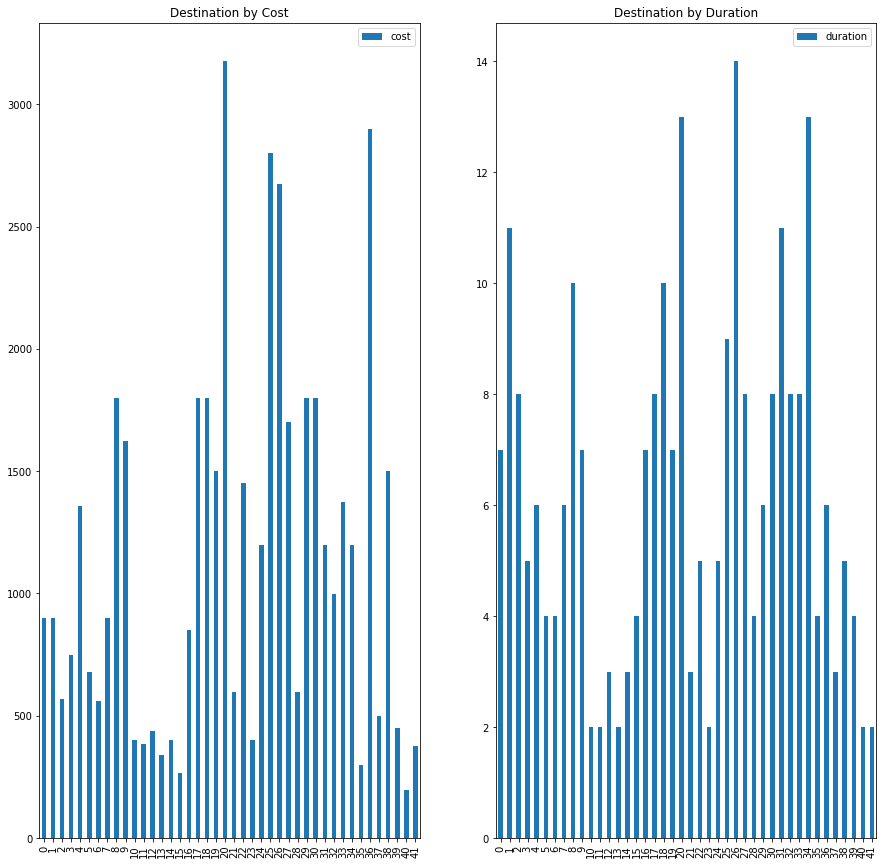

In [48]:
fig, axs = plt.subplots(1,2)
my_plot = data[['destination', 'cost']].plot(kind='bar', title="Destination by Cost", ax=axs[0])
my_plot = data[['destination', 'duration']].plot(kind='bar', title="Destination by Duration", ax=axs[1],figsize= [15,15])

In [62]:
# create the LP object, set up as a minimization problem --> since we want to minimize the costs 
prob = pulp.LpProblem('GoingOnVacation', pulp.LpMinimize)

In [63]:
decision_variables = []
for rownum, row in data.iterrows():
	variable = str('x' + str(rownum))
	variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 1, cat= 'Integer') #make variables binary
	decision_variables.append(variable)

print ("Total number of decision_variables: " + str(len(decision_variables)))
print ("Array with Decision Variables:" + str(decision_variables))

Total number of decision_variables: 42
Array with Decision Variables:[x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24, x25, x26, x27, x28, x29, x30, x31, x32, x33, x34, x35, x36, x37, x38, x39, x40, x41]


In [64]:
total_cost = ""
for rownum, row in data.iterrows():
	for i, schedule in enumerate(decision_variables):
		if rownum == i:
			formula = row['cost']*schedule
			total_cost += formula

prob += total_cost
print ("Optimization function: " + str(total_cost))

Optimization function: 899*x0 + 899*x1 + 399*x10 + 385*x11 + 439*x12 + 339*x13 + 399*x14 + 265*x15 + 849*x16 + 1799*x17 + 1799*x18 + 1499*x19 + 568*x2 + 3175*x20 + 599*x21 + 1450*x22 + 399*x23 + 1199*x24 + 2799*x25 + 2675*x26 + 1699*x27 + 599*x28 + 1798*x29 + 750*x3 + 1799*x30 + 1199*x31 + 999*x32 + 1375*x33 + 1199*x34 + 299*x35 + 2898*x36 + 499*x37 + 1499*x38 + 450*x39 + 1356*x4 + 198*x40 + 375*x41 + 680*x5 + 559*x6 + 899*x7 + 1799*x8 + 1625*x9


In [65]:
aval_vacation_days = 10
total_vacation_days = ""
for rownum, row in data.iterrows():
	for i, schedule in enumerate(decision_variables):
		if rownum == i:
			formula = row['duration']*schedule
			total_vacation_days += formula

prob += (total_vacation_days == aval_vacation_days)
print ("Subject to: " + str(total_vacation_days))

Subject to: 7*x0 + 11*x1 + 2*x10 + 2*x11 + 3*x12 + 2*x13 + 3*x14 + 4*x15 + 7*x16 + 8*x17 + 10*x18 + 7*x19 + 8*x2 + 13*x20 + 3*x21 + 5*x22 + 2*x23 + 5*x24 + 9*x25 + 14*x26 + 8*x27 + 4*x28 + 6*x29 + 5*x3 + 8*x30 + 11*x31 + 8*x32 + 8*x33 + 13*x34 + 4*x35 + 6*x36 + 3*x37 + 5*x38 + 4*x39 + 6*x4 + 2*x40 + 2*x41 + 4*x5 + 4*x6 + 6*x7 + 10*x8 + 7*x9


In [55]:
print (prob)
prob.writeLP("GoingOnVacation.lp" )

GoingOnVacation:
MINIMIZE
899*x0 + 899*x1 + 399*x10 + 385*x11 + 439*x12 + 339*x13 + 399*x14 + 265*x15 + 849*x16 + 1799*x17 + 1799*x18 + 1499*x19 + 568*x2 + 3175*x20 + 599*x21 + 1450*x22 + 399*x23 + 1199*x24 + 2799*x25 + 2675*x26 + 1699*x27 + 599*x28 + 1798*x29 + 750*x3 + 1799*x30 + 1199*x31 + 999*x32 + 1375*x33 + 1199*x34 + 299*x35 + 2898*x36 + 499*x37 + 1499*x38 + 450*x39 + 1356*x4 + 198*x40 + 375*x41 + 680*x5 + 559*x6 + 899*x7 + 1799*x8 + 1625*x9 + 0
SUBJECT TO
_C1: 7 x0 + 11 x1 + 2 x10 + 2 x11 + 3 x12 + 2 x13 + 3 x14 + 4 x15 + 7 x16
 + 8 x17 + 10 x18 + 7 x19 + 8 x2 + 13 x20 + 3 x21 + 5 x22 + 2 x23 + 5 x24
 + 9 x25 + 14 x26 + 8 x27 + 4 x28 + 6 x29 + 5 x3 + 8 x30 + 11 x31 + 8 x32
 + 8 x33 + 13 x34 + 4 x35 + 6 x36 + 3 x37 + 5 x38 + 4 x39 + 6 x4 + 2 x40
 + 2 x41 + 4 x5 + 4 x6 + 6 x7 + 10 x8 + 7 x9 = 10

_C2: 7 x0 + 11 x1 + 2 x10 + 2 x11 + 3 x12 + 2 x13 + 3 x14 + 4 x15 + 7 x16
 + 8 x17 + 10 x18 + 7 x19 + 8 x2 + 13 x20 + 3 x21 + 5 x22 + 2 x23 + 5 x24
 + 9 x25 + 14 x26 + 8 x27 + 4 x28 + 6 

In [69]:
optimization_result = prob.solve()

assert optimization_result == pulp.LpStatusOptimal
print("Status:", LpStatus[prob.status])
print("Optimal Solution to the problem: ", value(prob.objective))
print ("Individual decision_variables: ")
for v in prob.variables():
	print(v.name, "=", v.varValue)

Status: Optimal
Optimal Solution to the problem:  None
Individual decision_variables: 
__dummy = None
x0 = 0.0
x1 = 0.0
x10 = 0.0
x11 = 0.0
x12 = 0.0
x13 = 0.0
x14 = 0.0
x15 = 1.0
x16 = 0.0
x17 = 0.0
x18 = 0.0
x19 = 0.0
x2 = 0.0
x20 = 0.0
x21 = 0.0
x22 = 0.0
x23 = 0.0
x24 = 0.0
x25 = 0.0
x26 = 0.0
x27 = 0.0
x28 = 1.0
x29 = 0.0
x3 = 0.0
x30 = 0.0
x31 = 0.0
x32 = 0.0
x33 = 0.0
x34 = 0.0
x35 = 0.0
x36 = 0.0
x37 = 0.0
x38 = 0.0
x39 = 0.0
x4 = 0.0
x40 = 1.0
x41 = 0.0
x5 = 0.0
x6 = 0.0
x7 = 0.0
x8 = 0.0
x9 = 0.0


In [70]:
prob.objective = []
variable_value = []

for v in prob.variables():
	variable_name.append(v.name)
	variable_value.append(v.varValue)

df = pd.DataFrame({'variable': variable_name, 'value': variable_value})
for rownum, row in df.iterrows():
	value = re.findall(r'(\d+)', row['variable'])
	df.loc[rownum, 'variable'] = int(value[0])

df = df.sort_values(by='variable')

#append results
for rownum, row in data.iterrows():
	for results_rownum, results_row in df.iterrows():
		if rownum == results_row['variable']:
			data.loc[rownum, 'decision'] = results_row['value']
            
data[:5]


ValueError: arrays must all be same length

In [14]:
data[data['decision'] == 1]

,destination,duration,cost,decision
15,Maine,4,265,1.0
35,Oregon,4,299,1.0
40,Oregon,2,198,1.0


In [15]:
print("Optimal Solution to the problem: ", value(prob.objective))
data[data['decision'] == 1]['cost'].sum(axis=1)

ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

In [22]:
data.describe()

,duration,cost
count,42.000000,42.000000
mean,6.166667,1128.261905
std,3.275308,774.499777
min,2.000000,198.000000
25%,4.000000,462.250000
50%,6.000000,899.000000
75%,8.000000,1593.500000
max,14.000000,3175.000000
